In [234]:
import editdistance as ed
import numpy as np
import networkx as nx

In [235]:
import matplotlib.pyplot as plt

In [236]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines = [x[:31] for x in f.readlines()][1:]

In [237]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [[y[:31] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [238]:
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])

In [239]:
from collections import Counter, OrderedDict

In [191]:
counter = Counter(lines)
ord_dict = OrderedDict()

In [192]:
u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

In [193]:
args_s = np.argsort(counts)[::-1]

In [194]:
for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [ ]:
sp_to_n = {}

In [213]:
   
def squash(od, t):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in od.items():
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
            min_ed = t
            answ_item = -1
            for comp_item in answ.items():
                dist = ed.eval(init_item[0], comp_item[0])
                if dist < min_ed:
                    min_ed = dist
                    answ_item = comp_item

            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [214]:
od = OrderedDict({"aaa" : 10, "acb" : 3, "aac" : 1, "xyc" : 1})

In [215]:
squash(od, 3)

new spacer: aaa 10
add: acb to aaa 13
add: aac to aaa 14
new spacer: xyc 1


(OrderedDict([('aaa', 14), ('xyc', 1)]),
 {'aaa': 0, 'aac': 0, 'acb': 0, 'xyc': 1})

In [217]:
nd, sp_to_n = squash(ord_dict, 6)

new spacer: ACACGCCCTTATCAAATAGCTGTGATTTACC 27154
new spacer: GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 19586
new spacer: AGTGCTGGACCATTTCAAATTCACAATAGAT 13653
new spacer: ATAGACCCCGAACAACAATACGCGCAAACCG 13288
new spacer: CAAGTGATATCCATCATCGCATCCAGTGCGC 10866
new spacer: GGAATGATATTTCAATAAATAATTATAACAA 7991
new spacer: TACCGTACAGACTGCCGGATATTATTTTTTT 7251
new spacer: CCCTCACACCGATTCGCCAAACGGTGGAGAA 6594
new spacer: CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA 6033
new spacer: AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG 4774
new spacer: TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3645
new spacer: AGCTGGGCGAAATTTTGATTCATCGTGATGA 3548
new spacer: TATAGAGATCGTTTTTGGAATTTACAGCGAG 3521
new spacer: ATATATCAGAGCAAAAAACAAAGCCACAGCC 2763
new spacer: CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2629
new spacer: TTTTACAGTGTCAACAATCGTTCCCTGATTG 2481
new spacer: CCGTAAGTGGTTTGAGCGATGATATTTGTGC 2271
new spacer: CCGCCGTTGGCACCGTCAAACTCCGGTACTG 1811
new spacer: GTAGTCCATCATTCCACCTATGTCTGAACTC 412
new spacer: TCGGTTCAGGCGTTGCAAACCTGGCTACCGG 319
new spacer: CTGTT

add: CCCTCGCACCGATTCGCCAAACGGTGGAGAA to CCCTCACACCGATTCGCCAAACGGTGGAGAA 6676
add: CATAAAGAAACTATTCTGCGTTTCGTTCAGG to CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2638
add: GGAATGATATTTCAATAAATAATTATAGCAA to GGAATGATATTTCAATAAATAATTATAACAA 8221
add: GACAAAACGGCCTCAGTAGTCTCGTCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 20221
add: ATATATCAGAGCAAAAAACAGAGCCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2772
add: ATACATCAGAGCAAAAAACAAAGCCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2781
add: AGCTGGGCGAAACTTTGATTCATCGTGATGA to AGCTGGGCGAAATTTTGATTCATCGTGATGA 3597
add: ACACGCCCTTATCAAATAGCTGTAATTTACC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28164
add: TTTTACAGTGTCAACAATCGTTCCCTGGTTG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2490
add: ATAGACCCCGAACAACAATACGCGCAAACTG to ATAGACCCCGAACAACAATACGCGCAAACCG 13762
add: TACCGTACAGACTGCCGGATATTATTTTCTT to TACCGTACAGACTGCCGGATATTATTTTTTT 7488
add: GACAGAACGGCCTCAGTAGTCTCATCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 20230
add: ACATATCAGAGCAAAAAACAAAGCCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 

add: CTGTTTTCGCAAATCTATGGACTATTGCTAC to CTGTTTTCGCAAATCTATGGACTATTGCTAT 317
add: AACGTCAGGTTGTCGCCGCTTTGCGTGGTCG to AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG 4925
add: CCGCCGTTGGCACCGTCAAGCTCCGGTACTG to CCGCCGTTGGCACCGTCAAACTCCGGTACTG 1862
new spacer: AGTGCTGGACCATTTCAAATAGCTGTGATTT 3
add: AGCTGGGCGAAATTTTGATTCATCGTGATAA to AGCTGGGCGAAATTTTGATTCATCGTGATGA 3688
add: AGTGCTGGACAATTTCAAATTCACAATAGAT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14276
add: AACGTCAGGTTGTCGCCGTTCTGCGTGGTCG to AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG 4928
add: CAAGTGATATCAATCATCGCATCCAGTGCGC to CAAGTGATATCCATCATCGCATCCAGTGCGC 11253
add: CCCTCACACCGATTCGCCAAACGGTGGAAAA to CCCTCACACCGATTCGCCAAACGGTGGAGAA 6812
add: CCACCGTTGGCACCGTCAAACTCCGGTACTG to CCGCCGTTGGCACCGTCAAACTCCGGTACTG 1865
add: CATAAGGAAACTATTTTGCGTTTCGTTCAGG to CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2716
add: TGCATGGCTTTGGTTTCCTCTTTGACGGACG to TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3752
add: CATAAAGAAACTATTTTGCGTCTCGTTCAGG to CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2719
add: CTGCCGTTGGCACCGTCAAACTCC

add: ATATATCAGAGCAAAAAACAAAGCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2902
add: TATAGAGTTCGTTTTTGGAATTTACAGCGAG to TATAGAGATCGTTTTTGGAATTTACAGCGAG 3679
add: TGCATGGCTTTGGCTTCCTCTTTGACGGAGG to TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3780
add: TGCAAGGCTTTGGCTTCCTCTTTGACGGACG to TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3781
add: AGTGCTGGGCCATTTCAAATTCATAATAGAT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14326
add: TATTGAGATCGTTTTTGGAATTTACGGCGAG to TATAGAGATCGTTTTTGGAATTTACAGCGAG 3680
add: ACACGTCCTTATCAAGTAGCTGTGATTTACC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28346
add: TGGGCGGCTTGCCTTGCAGCCAGCTTCAGCA to TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA 88
add: CTGCTGCTCGAACTGGTGGAGTGCTGCTATA to CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA 6250
add: AGTGCTGGAACATTTCAAATTCACAATAGAT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14327
add: TTTTACAGTGTCAACGATCGTTCCCTGATTG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2594
add: CATAAAGAAACTATTTAGCGTTTCGTTCAGG to CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2744
add: GACAGAACGGCCTCAGTAGTCCCGGCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 2037

add: TCGGTTCAGGCGTTGCAAACCTGGCTAC to TCGGTTCAGGCGTTGCAAACCTGGCTACCGG 328
add: CAAGTAATATCCATCATTGCATCCAGTGCGC to CAAGTGATATCCATCATCGCATCCAGTGCGC 11310
add: AGTGCTGGACCATTTCAAATTCACAATAGA to AGTGCTGGACCATTTCAAATTCACAATAGAT 14346
add: AGTGCTGGACCATCTCAAATTCACAATAGAC to AGTGCTGGACCATTTCAAATTCACAATAGAT 14347
add: ATTGACCCCGAACAACAATACGCGCAAACCG to ATAGACCCCGAACAACAATACGCGCAAACCG 13967
add: TTTTACAGTGTCAATAATCGTTCCCTGATTG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2607
add: CCGTAAGTGGTTTGAGCGTTGATATTTGTGC to CCGTAAGTGGTTTGAGCGATGATATTTGTGC 2387
add: ATATATCAGAGCAAAAAACAAAACCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2916
add: ACACGCCCTTGTCAAATAGCTGTGATTCACC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28368
add: ACACGCCCTTATCAGATAGCTGTGGTTTGCC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28369
add: GGAATGATATTTCAATAGGTAATTATAACAA to GGAATGATATTTCAATAAATAATTATAACAA 8383
add: TGCATGGCATTGGCTTCCTCTTTGACGGACG to TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3796
add: ATAGACCCCGAAGAACAATACGCGCAAACCG to ATAGACCCCGAACAACAATACGCGCAAACCG 139

In [197]:
for item in sp_to_n


OrderedDict([('ACACGCCCTTATCAAATAGCTGTGATTTACC', 27154),
             ('GACAGAACGGCCTCAGTAGTCTCGTCAGGCT', 19586),
             ('AGTGCTGGACCATTTCAAATTCACAATAGAT', 13653),
             ('ATAGACCCCGAACAACAATACGCGCAAACCG', 13288),
             ('CAAGTGATATCCATCATCGCATCCAGTGCGC', 10866),
             ('GGAATGATATTTCAATAAATAATTATAACAA', 7991),
             ('TACCGTACAGACTGCCGGATATTATTTTTTT', 7251),
             ('CCCTCACACCGATTCGCCAAACGGTGGAGAA', 6594),
             ('CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA', 6033),
             ('AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG', 4774),
             ('TGCATGGCTTTGGCTTCCTCTTTGACGGACG', 3645),
             ('AGCTGGGCGAAATTTTGATTCATCGTGATGA', 3548),
             ('TATAGAGATCGTTTTTGGAATTTACAGCGAG', 3521),
             ('ATATATCAGAGCAAAAAACAAAGCCACAGCC', 2763),
             ('CATAAAGAAACTATTTTGCGTTTCGTTCAGG', 2629),
             ('TTTTACAGTGTCAACAATCGTTCCCTGATTG', 2481),
             ('CCGTAAGTGGTTTGAGCGATGATATTTGTGC', 2271),
             ('CCGCCGTTGGCACCGTCAAACTCCGGTA

In [218]:
sp_to_n

{'ACACGCCCTTATCAAATAGCTGTGATTTACC': 0,
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT': 1,
 'AGTGCTGGACCATTTCAAATTCACAATAGAT': 2,
 'ATAGACCCCGAACAACAATACGCGCAAACCG': 3,
 'CAAGTGATATCCATCATCGCATCCAGTGCGC': 4,
 'GGAATGATATTTCAATAAATAATTATAACAA': 5,
 'TACCGTACAGACTGCCGGATATTATTTTTTT': 6,
 'CCCTCACACCGATTCGCCAAACGGTGGAGAA': 7,
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA': 8,
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG': 9,
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG': 10,
 'AGCTGGGCGAAATTTTGATTCATCGTGATGA': 11,
 'TATAGAGATCGTTTTTGGAATTTACAGCGAG': 12,
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC': 13,
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG': 14,
 'TTTTACAGTGTCAACAATCGTTCCCTGATTG': 15,
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGC': 16,
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTG': 17,
 'GTAGTCCATCATTCCACCTATGTCTGAACTC': 18,
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG': 19,
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT': 20,
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA': 21,
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC': 22,
 'TGGCTCTGCAACAGCAGCACCCATGACCACG': 23,
 'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG': 24,
 'CCGGGGGA

In [219]:
nd


OrderedDict([('ACACGCCCTTATCAAATAGCTGTGATTTACC', 28374),
             ('GACAGAACGGCCTCAGTAGTCTCGTCAGGCT', 20414),
             ('AGTGCTGGACCATTTCAAATTCACAATAGAT', 14353),
             ('ATAGACCCCGAACAACAATACGCGCAAACCG', 13974),
             ('CAAGTGATATCCATCATCGCATCCAGTGCGC', 11315),
             ('GGAATGATATTTCAATAAATAATTATAACAA', 8389),
             ('TACCGTACAGACTGCCGGATATTATTTTTTT', 7672),
             ('CCCTCACACCGATTCGCCAAACGGTGGAGAA', 6864),
             ('CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA', 6274),
             ('AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG', 4979),
             ('TGCATGGCTTTGGCTTCCTCTTTGACGGACG', 3798),
             ('AGCTGGGCGAAATTTTGATTCATCGTGATGA', 3740),
             ('TATAGAGATCGTTTTTGGAATTTACAGCGAG', 3707),
             ('ATATATCAGAGCAAAAAACAAAGCCACAGCC', 2920),
             ('CATAAAGAAACTATTTTGCGTTTCGTTCAGG', 2764),
             ('TTTTACAGTGTCAACAATCGTTCCCTGATTG', 2611),
             ('CCGTAAGTGGTTTGAGCGATGATATTTGTGC', 2390),
             ('CCGCCGTTGGCACCGTCAAACTCCGGTA

In [205]:
sp_to_n = {}
for i, it in enumerate(nd.items()):
    if it[1] > 50:
        sp_to_n[it[0]] = i

In [206]:
len(sp_to_n)

34

In [244]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [[sp_to_n[y[:31]] for y in x[:-2].split(' ') if y[:31] in sp_to_n] for x in f.readlines()]

In [245]:
graph = np.zeros((len(sp_to_n),len(sp_to_n)))

In [246]:
err = 0
for p in pairs:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

In [247]:
len(pairs)

74627

In [249]:
edges, G = to_graph(graph, 34, 20)

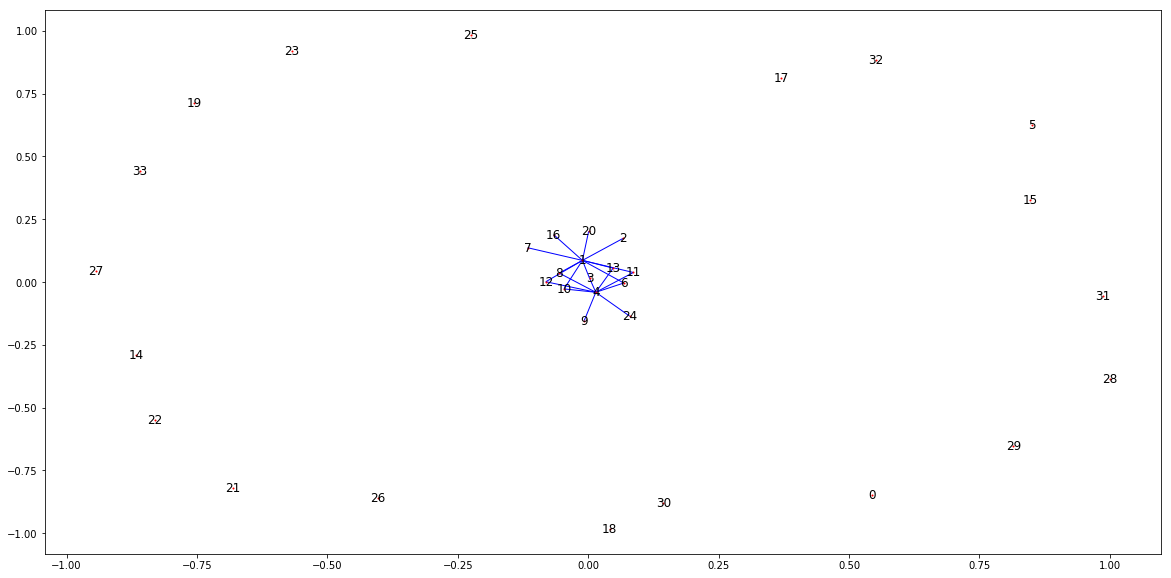

In [250]:
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=1)
plt.show()

In [232]:
for sp in ans_3_31:
    print(sp_to_n[sp])
    

24
19
18
25
30
27
26
28
31
32
33
34
1
20
22
23
21
29
1
0
3
6
8
9
10
13
14
15
17
12
16
2
5
7
11


In [181]:
sp_to_n

{'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG': 10,
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT': 25,
 'ACACGCCCTTATCAAATAGCTGTGATTTACC': 1,
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT': 33,
 'AGCTGGGCGAAATTTTGATTCATCGTGATGA': 11,
 'AGTGCTGGACCATTTCAAATTCACAATAGAT': 4,
 'ATAGACCCCGAACAACAATACGCGCAAACCG': 3,
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC': 14,
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG': 29,
 'CAAGTGATATCCATCATCGCATCCAGTGCGC': 2,
 'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG': 22,
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG': 15,
 'CCCTCACACCGATTCGCCAAACGGTGGAGAA': 9,
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTG': 17,
 'CCGGGGGATAATGTTTACGGTCATGCGCCCC': 26,
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGC': 12,
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA': 7,
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT': 20,
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA': 23,
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT': 0,
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATT': 28,
 'GCGACCGCTCAGAAATTCCAGACCCGATCCA': 30,
 'GGAATGATATTTCAATAAATAATTATAACAA': 6,
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC': 21,
 'GTAGTCCATCATTCCACCTATGTCTGAACTC': 18,
 'TACCGT

In [182]:
ans_3 = ["CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC	TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG	GTAGTCCATCATTCCACCTATGTCTGAACTCC	CCGGGGGATAATGTTTACGGTCATGCGCCCCC	TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG	AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC	TAGTTTCCGTATCTCCGGATTTATAAAGCTGA	GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG	GCGACCGCTCAGAAATTCCAGACCCGATCCAAA	TCAACATTATCAATTACAACCGACAGGGAGCC	AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG	TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	CTGTTTTCGCAAATCTATGGACTATTGCTATT	GGGCGCACGGAATACAAAGCCGTGTATCTGCT	TGGCTCTGCAACAGCAGCACCCATGACCACGT	GAAATGCTGGTGAGCGTTAATGCCGCAAACAC	ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	ACACGCCCTTATCAAATAGCTGTGATTTACCTA	ATAGACCCCGAACAACAATACGCGCAAACCGA	TACCGTACAGACTGCCGGATATTATTTTTTTG	CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG	AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC	TGCATGGCTTTGGCTTCCTCTTTGACGGACGC	ATATATCAGAGCAAAAAACAAAGCCACAGCCA	CATAAAGAAACTATTTTGCGTTTCGTTCAGGT	TTTTACAGTGTCAACAATCGTTCCCTGATTGT	CCGCCGTTGGCACCGTCAAACTCCGGTACTGT	TATAGAGATCGTTTTTGGAATTTACAGCGAGG	CCGTAAGTGGTTTGAGCGATGATATTTGTGCT",
"AGTGCTGGACCATTTCAAATTCACAATAGATT	GGAATGATATTTCAATAAATAATTATAACAAT	CCCTCACACCGATTCGCCAAACGGTGGAGAAG	AGCTGGGCGAAATTTTGATTCATCGTGATGAC"]

In [183]:
ans_3_31 = []
for seq in ans_3:
    for sp in seq.split("\t"):
        ans_3_31.append(sp[:31])

In [184]:
ans_3_31

['CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
 'GTAGTCCATCATTCCACCTATGTCTGAACTC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCC',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTG',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATT',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
 'TCAACATTATCAATTACAACCGACAGGGAGC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
 'TGGCTCTGCAACAGCAGCACCCATGACCACG',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACC',
 'ATAGACCCCGAACAACAATACGCGCAAACCG',
 'TACCGTACAGACTGCCGGATATTATTTTTTT',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'TTTTACAGTGTCAACAATCGTTCCCT

In [166]:
def to_graph(gr, clusters_num, edges_num):
    G=nx.Graph()
    G.add_nodes_from(np.arange(clusters_num))
    
    edges = []
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x][y] = 0
        gr[y][x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

In [ ]:
def get_chain(pairs gmm, clusters_num, links, internal):
    
    graph = np.zeros((clusters_num,clusters_num)).astype(int)


    for p in tqdm(c_p):
        graph[p[0]][p[1]] += 1
        
    pairs, G = to_graph(graph, clusters_num, links)
    
    fig, ax = plt.subplots(figsize=(20, 10))
    nx.draw_networkx(G, edge_color='b', node_size=1)
    plt.show()
    
    
    #arr_to_sp(sp_9)
    return G, c_p, pairs